# DS320 Spring 2024: Final Project

Posted on 04/29/24, Due on 05/15/24 at 11:59 PM

We continue with the HCQ dataset in the midterm, and you are provided few more datasets: the Google Trend score of HCQ searching in 2020, tweets with sentiments, and geoMap.

You will use the clean HCQ dataset you have done for the midterm project. Do not upload the dataset to your Jupyter Luther since it is big. You need to download this notebook and work on it with Google Colab.

There are 10 tasks, each is worth 10 points. The bonus task is worth 20 points.

Note: I will mannually grade your code, so no test cases will be provided, but I can give you the expectation of the outcomes for tasks as I can.  
You need to run your code to get full credit.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import libraries

In [ ]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


## Task 1:

We want to see the online users’ reaction patterns in the time
domain, including (a) Number of tweets, favorites on Twitter, (b) Google
keyword search score.

Create the following plot. You can take the events of the plot from the HCQ_event.csv file. Your figure should look similar (though not necessarily identical)

![Task 1](./images/task1.png)

In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()
df_event = pd.read_csv("/content/drive/MyDrive/Assignments/DS320/HCQ_event.csv")
# df_trend = pd.read_csv("/content/drive/MyDrive/Assignments/DS320/GGtrend_HCQ_2020.csv", skiprows=[0]).set_index("Week")
# df_trend["Hydroxychloroquine: (United States)"].astype(int)
df_tweets = pd.read_csv("/content/drive/MyDrive/Assignments/DS320/tweets.csv")
df_tweets.drop("Unnamed: 0", inplace=True, axis=1)
df_tweets.created_at = pd.to_datetime(df_tweets.created_at, format="%Y-%m-%d")
df_geo = pd.read_csv("/content/drive/MyDrive/Assignments/DS320/geoMap.csv")
df_trend = pd.read_csv("/content/drive/MyDrive/Assignments/DS320/gg_trend_2020.csv")
df_trend["date"] = pd.to_datetime(df_trend.Day, format="%m/%d/%y")
df_trend.drop(columns = "Day", inplace=True)
df_trend.set_index("date", inplace=True)


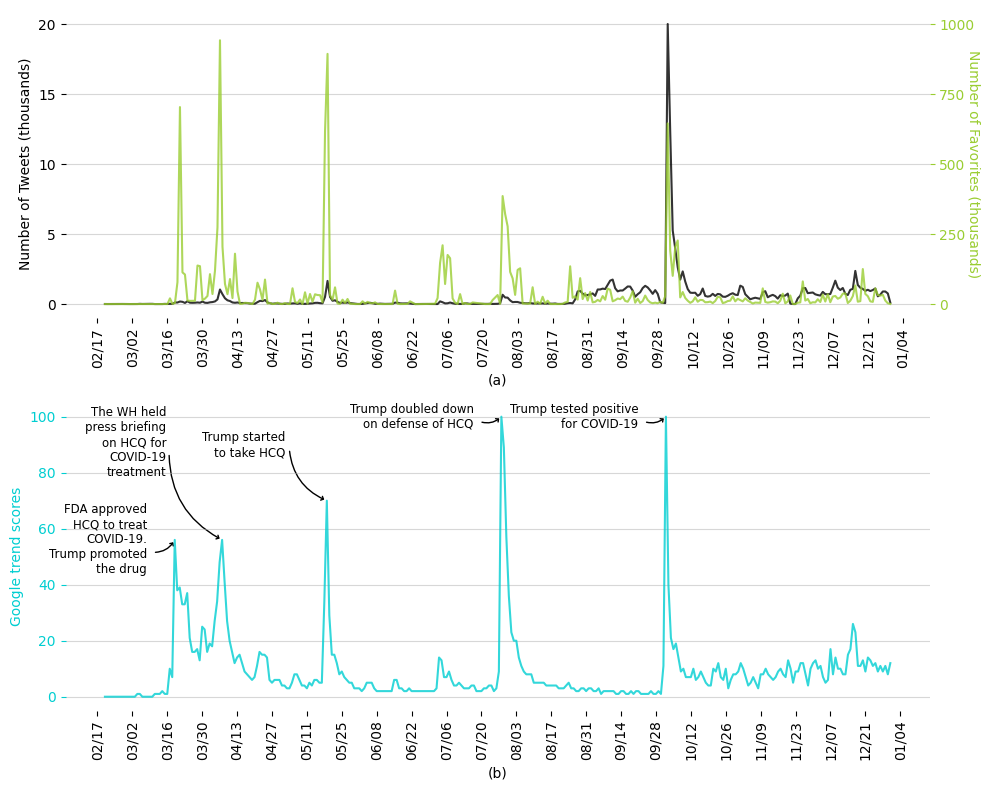

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Convert 'created_at' column to datetime
df_tweets['created_at'] = pd.to_datetime(df_tweets['created_at'])

# Aggregate tweet data by date
agg_df_tweets = df_tweets.groupby(df_tweets['created_at'].dt.date).agg({
    'full_text': 'count',           # Number of tweets
    'favorite_count': 'sum'         # Total favorites
}).reset_index()

# Ensure 'created_at' in agg_df_tweets is datetime
agg_df_tweets['created_at'] = pd.to_datetime(agg_df_tweets['created_at'], format="%Y-%m-%d")

# Convert counts to thousands for y-axis
agg_df_tweets['full_text'] /= 1000
agg_df_tweets['favorite_count'] /= 1000

# Define the interval for xticks
interval = 14  # For example, every 14 days

# Generate x-tick positions and labels
start_date = pd.to_datetime('2020-02-17')  # Start date for x-ticks
end_date_tweets = agg_df_tweets['created_at'].max()
end_date_trend = df_trend.index.max()

# Define the start date for plotting the data
start_plotting_date = pd.to_datetime('2020-02-20')
end_date = pd.to_datetime('2021-01-04')    # End date for x-ticks

# Generate x-ticks starting from 02/17/20 and ending at 01/04/21
xtick_positions = pd.date_range(start=start_date, end=end_date, freq=f'{interval}D')
xtick_labels = xtick_positions.strftime('%m/%d')

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot for tweet data starting from 02/20
df_tweets_for_plot = agg_df_tweets.loc[agg_df_tweets['created_at'] >= start_plotting_date]

color = 'black'
ax1.set_ylabel('Number of Tweets (thousands)', color=color)
ax1.plot(df_tweets_for_plot['created_at'], df_tweets_for_plot['full_text'], color=color, alpha=0.8)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yticks([0, 5, 10, 15, 20])
ax1.grid(axis='y', linestyle='-', alpha=0.5)  # Add y-grid

# Right y-axis for tweet data
ax1_right = ax1.twinx()
color = 'yellowgreen'
ax1_right.set_ylabel('Number of Favorites (thousands)', color=color, rotation=270)  # Rotate the label
ax1_right.plot(df_tweets_for_plot['created_at'], df_tweets_for_plot['favorite_count'], color=color, alpha=0.8)
ax1_right.tick_params(axis='y', colors=color)
ax1_right.set_yticks([0, 250, 500, 750, 1000])

# Scaling the right y-axis to match the left y-axis
scaling_factor = 250 / 5  # Set the scaling factor
ax1_right.set_yticks([0, 250, 500, 750, 1000])
ax1_right.set_ylim(ax1.get_ylim()[0] * scaling_factor, ax1.get_ylim()[1] * scaling_factor)

# Remove spines
for spine in ax1.spines.values():
    spine.set_visible(False)
for spine in ax1_right.spines.values():
    spine.set_visible(False)

# Set x-ticks and labels for the first subplot
ax1.set_xticks(xtick_positions)
ax1.set_xticklabels(xtick_labels, rotation=90)  # Rotate x-tick labels for better readability
ax1.set_xlabel("(a)")

# Plot for trend data starting from 02/20
df_trend_for_plot = df_trend.loc[start_plotting_date:]
color = 'darkturquoise'
ax2.plot(df_trend_for_plot.index, df_trend_for_plot.values, color=color, alpha=0.8)
ax2.set_ylabel('Google trend scores', color=color)
ax2.set_xlabel('(b)')
ax2.grid(axis='y', linestyle='-', alpha=0.5)  # Add y-grid
ax2.tick_params(axis='y', colors=color)

# Set x-ticks and labels for the second subplot
ax2.set_xticks(xtick_positions)
ax2.set_xticklabels(xtick_labels, rotation=90)  # Rotate x-tick labels for better readability
ax2.set_xlabel('(b)')

# Remove spines
for spine in ax2.spines.values():
    spine.set_visible(False)

# Remove spines between subplots
plt.subplots_adjust(hspace=0.05)

# Add annotations for specific dates
annotations = {
    (datetime.strptime('2020-03-19', "%Y-%m-%d"), 'FDA approved\nHCQ to treat\nCOVID-19.\nTrump promoted\nthe drug', -20, 0),
    (datetime.strptime('2020-04-07', "%Y-%m-%d"), 'The WH held\npress briefing\non HCQ for\nCOVID-19\ntreatment', -40, 70),
    (datetime.strptime('2020-05-19', "%Y-%m-%d"), 'Trump started\nto take HCQ', -30, 40),
    (datetime.strptime('2020-07-28', "%Y-%m-%d"), 'Trump doubled down\non defense of HCQ', -20, 0),
    (datetime.strptime('2020-10-02', "%Y-%m-%d"), 'Trump tested positive\nfor COVID-19', -20, 0)

}

from matplotlib.patches import FancyArrowPatch

for date, label, xtext, ytext in annotations:
    if date in df_trend_for_plot.index:
        # Create the text annotation without arrow
        text_annotation = ax2.annotate(label, xy=(date, df_trend_for_plot.loc[date].mean()), xytext=(xtext, ytext),
                                       textcoords='offset points', ha='right', va='center', fontsize=8.5)

        # Get the bounding box of the text
        bb = text_annotation.get_window_extent()
        # print(bb)

        # Get the coordinates of the lower right point of the bounding box
        x0, y0 = bb.x1 + 8, bb.y0 + (bb.y1 - bb.y0)/3

        # Convert the coordinates to data coordinates
        posA = ax2.transData.inverted().transform((x0, y0))

        # Create the arrow using FancyArrowPatch
        arrow = FancyArrowPatch(posA=posA, posB=(date, df_trend_for_plot.loc[date].mean()), arrowstyle='->,head_length=1.5,head_width=1.5',
                                connectionstyle='arc3,rad=0.3', color='black', transform=ax2.transData)

        # Add the arrow to the plot
        ax2.add_patch(arrow)


# print(posA)
# print(posB)



fig.tight_layout()
plt.show()


## Task 2:

We want to look closer at the number of tweets and favorites sent out on the five above days (the days you made annotations on)

Create the following plot. Your figure should look similar (though not necessarily identical)

In this plot,

<b>
the teal bars = #tweets on an event day / mean of #tweets on a
day

the salmon bars = #favorites on an event day / mean of #favorites on a
day
</b>
![Task 2](./images/task2.png)

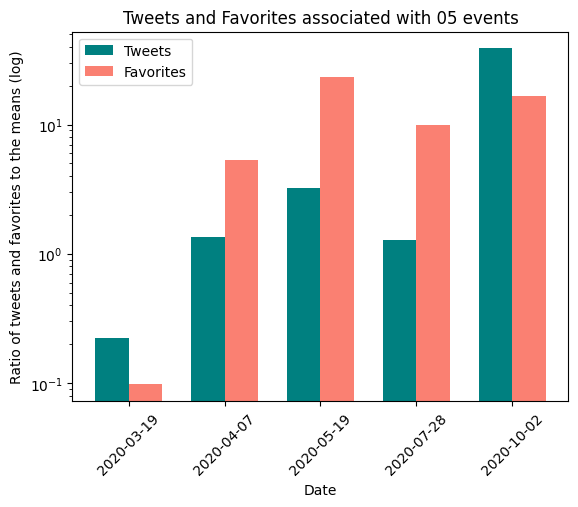

In [ ]:
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dates = ["2020-03-19", "2020-04-07", "2020-05-19", "2020-07-28", "2020-10-02"]
xtickslst = []
bar_width = 0.35
bar_pos = np.arange(len(dates))

# Sample data (replace this with your actual data)
avg_fav = agg_df_tweets.favorite_count.sum() / agg_df_tweets.full_text.count()
avg_count = agg_df_tweets.full_text.mean() * 1000

for i in range(len(dates)):
    date_str = dates[i]
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')

    data_day = agg_df_tweets[agg_df_tweets.created_at == date_obj]
    per_count = data_day.full_text * 1000 / avg_count
    per_fav = data_day.favorite_count / avg_fav

    per_count = per_count.values[0]
    per_fav = per_fav.values[0]
    # print("count, fav", per_count, per_fav)

    plt.bar(bar_pos[i] - bar_width/2, per_count, width=bar_width, color="teal")
    plt.bar(bar_pos[i] + bar_width/2, per_fav, width=bar_width, color="salmon")
    xtickslst.append(date_obj.strftime('%Y-%m-%d'))

plt.xticks(bar_pos, xtickslst, rotation=45)
plt.xlabel('Date')
plt.ylabel('Ratio of tweets and favorites to the means (log)')
plt.title('Tweets and Favorites associated with 05 events')
plt.yscale('log')

# Add legend
plt.legend(["Tweets", "Favorites"])

# plt.tight_layout()
plt.show()


## Task 3:

We want to see the distributions of reply_count and retweet_count for a tweet.

Create the following plot. Your figure should look similar (though not necessarily identical)

<i><b>What insights do you recognize from the plot?</b></i>

![Task 3](./images/task3.png)

Insight:
- The frequency of the tweets with the same number of retweets and number of reply are positively correlated.

- Tweets with higher retweet counts and reply counts have lower frequency than tweets with lower retweet counts and reply counts.


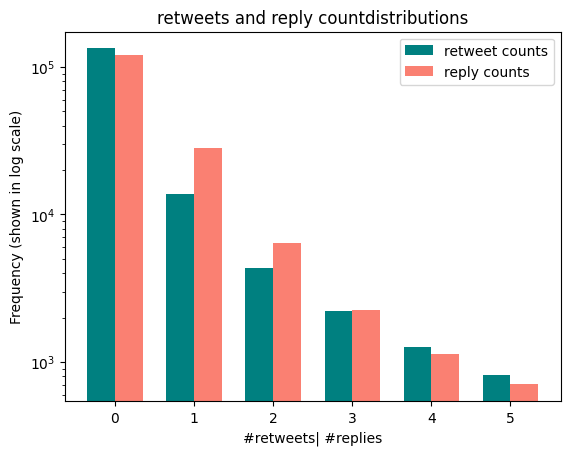

In [ ]:
bar_width = 0.35
bar_pos = np.arange(6)

for i in range(6):
  retweet_counts = df_tweets[df_tweets.retweet_count==i].full_text.count()
  reply_counts = df_tweets[df_tweets.reply_count==i].full_text.count()
  plt.bar(bar_pos[i] - bar_width/2, retweet_counts, width=bar_width, color="teal")
  plt.bar(bar_pos[i] + bar_width/2, reply_counts, width=bar_width, color="salmon")
  xtickslst.append(date_obj.strftime('%Y-%m-%d'))

# plt.xticks(bar_pos, xtickslst, rotation=45)
plt.xlabel('#retweets| #replies')
plt.ylabel('Frequency (shown in log scale)')
plt.title('retweets and reply countdistributions')
plt.yscale('log')

# Add legend
plt.legend(["retweet counts", "reply counts"])

# plt.tight_layout()
plt.show()

## Task 4:

We want to look see if there is any patterns of posted tweets and favorites over days of weeks.

Create the following plot. Your figure should look similar (though not necessarily identical)

<i><b>What insights do you recognize from the plot?</b></i>

![Task 4](./images/task4.png)

Insight:
- On Monday and Tuesday, number of favorites are significantly larger than other days of the week.
- On Saturday and Sunday, number of favorites have a sharp increase compared to midweek days

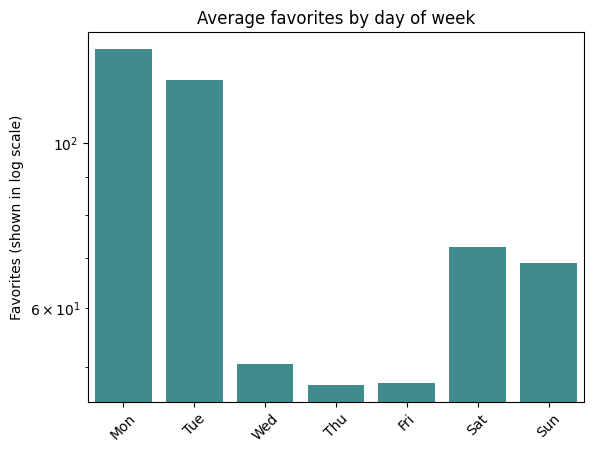

In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()

df_tweets["dayofweek"] = df_tweets.created_at.dt.dayofweek
df4 = (df_tweets.groupby("dayofweek").favorite_count.mean())
sns.barplot(df4, color='teal', alpha=.8)
plt.ylabel('Favorites (shown in log scale)')
plt.xlabel('')
plt.title('Average favorites by day of week')
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks=range(7), labels=day_names, rotation=45)
plt.yscale('log')


## Task 5:

We want to look see if there is any relationships between the number of tweets and the number of favorites sending out on a day.

Create the following plot. Your figure should look similar (though not necessarily identical)

<i><b>What insights do you recognize from the plot?</b></i>

![Task 5](./images/task5.png)

Insight: The number of tweets and the number of favorites sent out on a day is proportional

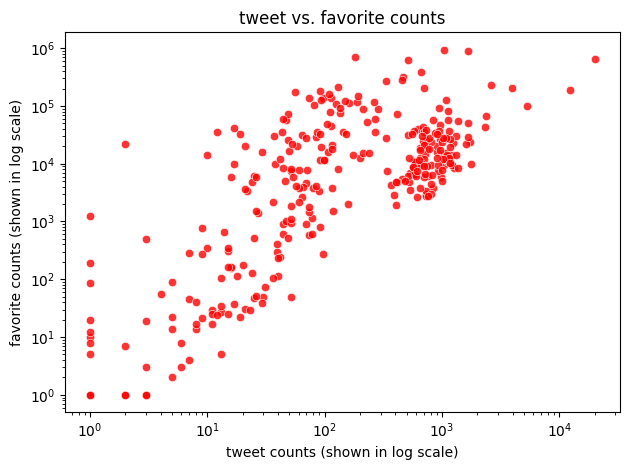

In [ ]:
df5 = df_tweets.groupby(df_tweets['created_at'].dt.date).agg({
    'full_text': 'count',           # Number of tweets
    'favorite_count': 'sum'         # Total favorites
}).reset_index()
sns.scatterplot(x = df5.full_text, y = df5.favorite_count, color='red', alpha=0.8)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('tweet counts (shown in log scale)')
plt.ylabel('favorite counts (shown in log scale)')
plt.title('tweet vs. favorite counts')

plt.tight_layout()
plt.show()

## Task 6:

Use the geoMap.csv file to produce a heatmap of Google HCQ searching score over states in the US.  

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 6](./images/task6.png)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
import missingno as msno
import os
import openpyxl
import math

In [ ]:
!wget "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip"


--2024-05-16 16:50:47--  https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip
Resolving www2.census.gov (www2.census.gov)... 23.2.93.217, 2600:1407:1800:3a2::208c, 2600:1407:1800:38b::208c
Connecting to www2.census.gov (www2.census.gov)|23.2.93.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘cb_2018_us_state_500k.zip’

cb_2018_us_state_50     [ <=>                ]   3.15M  --.-KB/s    in 0.09s   

2024-05-16 16:50:47 (35.4 MB/s) - ‘cb_2018_us_state_500k.zip’ saved [3304931]



In [ ]:
gdf = gpd.read_file('/content/cb_2018_us_state_500k.zip')
gdf.head()
df = df_geo
gdf = gdf.merge(df,left_on='STUSPS',right_on='Abb')


In [ ]:
# Apply this to the gdf to ensure all states are assigned colors by the same func
def makeColorColumn(gdf,variable,vmin,vmax):
    # apply a function to a column to create a new column of assigned colors & return full frame
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlGnBu)
    gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
    return gdf

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


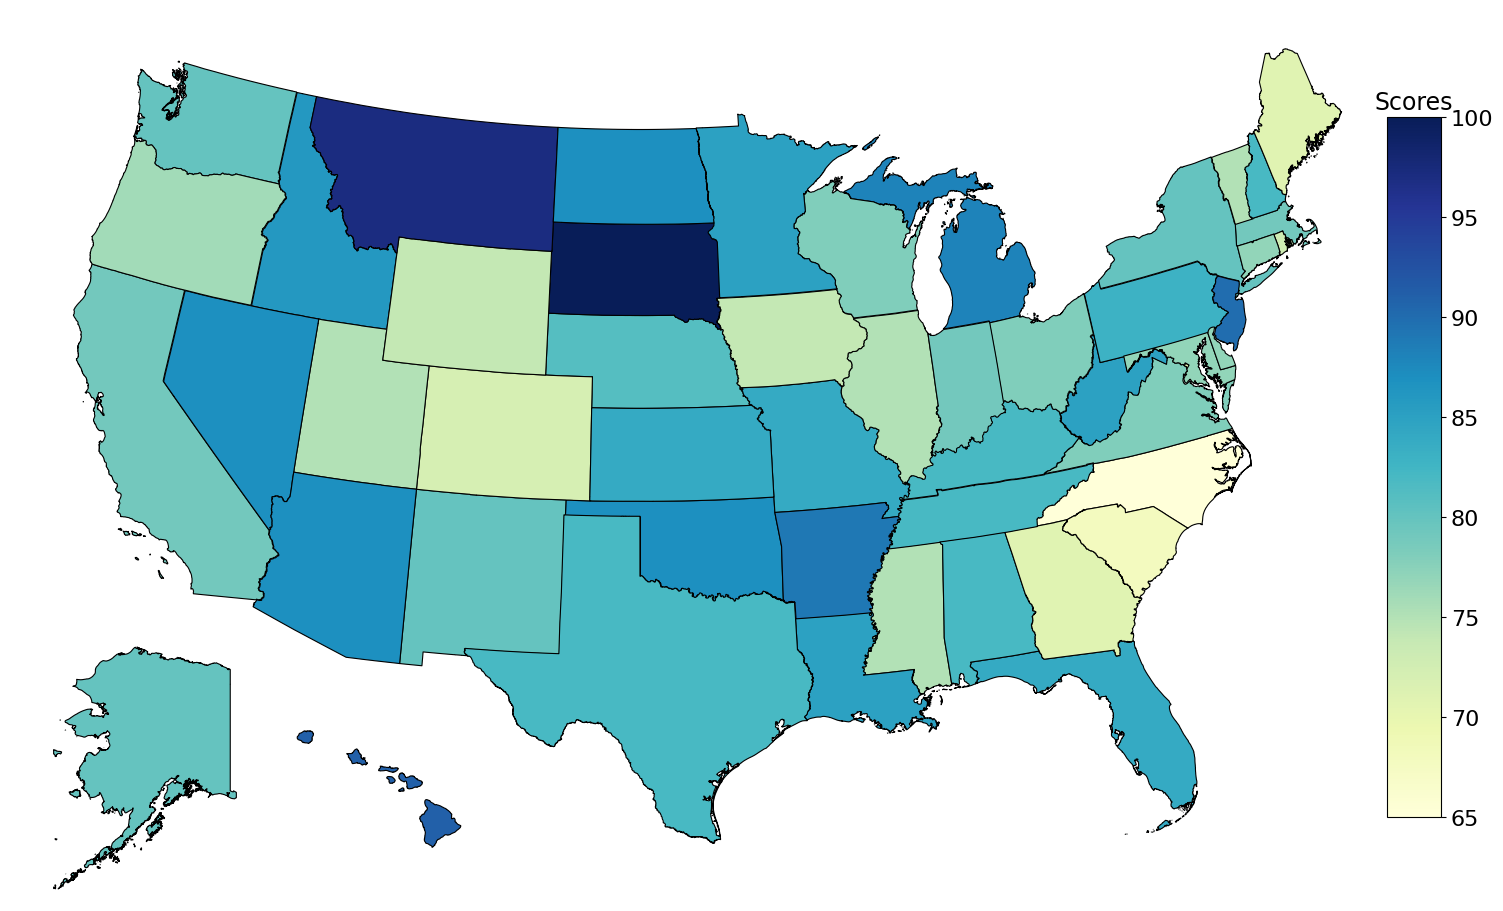

In [ ]:
# **************************
# set the value column that will be visualised
variable = 'Score'

# make a column for value_determined_color in gdf
# set the range for the choropleth values with the upper bound the rounded up maximum value
vmin, vmax = gdf.Score.min(), gdf.Score.max() #math.ceil(df.Score.max())
colormap = "YlGnBu"
gdf = makeColorColumn(gdf,variable,vmin,vmax)

# create "visframe" as a re-projected gdf using EPSG 2163 for CONUS
visframe = gdf.to_crs({'init':'epsg:2163'})

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box around the vis
ax.axis('off')


# Create colorbar legend
fig = ax.get_figure()
# add colorbar axes to the figure
# This will take some iterating to get it where you want it [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.89, 0.23, 0.03, 0.5])

# cbax.set_title('Scores\n', **hfont, fontdict={'fontsize': '15', 'fontweight' : '0'})
cbax.set_title('Scores', size=17)

# add color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
# reformat tick labels on legend
sm._A = []
comma_fmt = FuncFormatter(lambda x, p: format(x, '.0f'))
# comma_fmt = FuncFormatter(lambda x, p: format(x))
fig.colorbar(sm, cax=cbax, format=comma_fmt)
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)

# create map
# Note: we're going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
for row in visframe.itertuples():
    if row.Abb not in ['AK','HI']:
        vf = visframe[visframe.Abb==row.Abb]
        c = gdf[gdf.Abb==row.Abb][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='black')

# add Alaska
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])
akax.axis('off')
# polygon to clip western islands
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = gdf[gdf.Abb=='AK']
alaska_gdf.clip(polygon).plot(color=gdf[gdf.Abb=='AK'].value_determined_color, linewidth=0.8,ax=akax, edgecolor='black')

# add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])
hiax.axis('off')
# polygon to clip western islands
hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = gdf[gdf.Abb=='HI']
hawaii_gdf.clip(hipolygon).plot(column=variable, color=hawaii_gdf['value_determined_color'], linewidth=0.8,ax=hiax, edgecolor='black')

fig.savefig(os.getcwd()+'/state_scores.png',dpi=400, bbox_inches="tight")


## Task 7:

Use the tweets_manual_classifying.csv file to produce wordcloud plots

(a) Most frequently used words,

(b) [Bonus: 20 points for this plot] Positive vs. negative words using ”Bing” lexicon

Create the following plot.

Your figure should look similar (though not necessarily identical)

![Task 7](./images/task7.png)

# http://www.cs.uic.edu/~liub/FBS/opinion-lexicon-English.rar

In [ ]:
df_tweets_manual = pd.read_csv("/content/drive/MyDrive/Assignments/DS320/cleaned_manual.csv")

In [ ]:
df_tweets_manual["full_text"] = df_tweets_manual.full_text.str.replace("hydroxychloroquin", "")
df_tweets_manual["full_text"] = df_tweets_manual.full_text.str.replace("https", "")
df_tweets_manual["full_text"] = df_tweets_manual.full_text.str.replace(r"\bco\b", "", regex=True)
df_tweets_manual["full_text"] = df_tweets_manual.full_text.str.replace(r"\bcovid\b", "", regex=True)
df_tweets_manual["full_text"] = df_tweets_manual.full_text.str.replace(r"\btrump\b", "", regex=True)

df_tweets_manual["full_text"] = df_tweets_manual.full_text.str.replace("realdonaldtrump", "")


In [ ]:
# df_tweets_manual

(-0.5, 1999.5, 1999.5, -0.5)

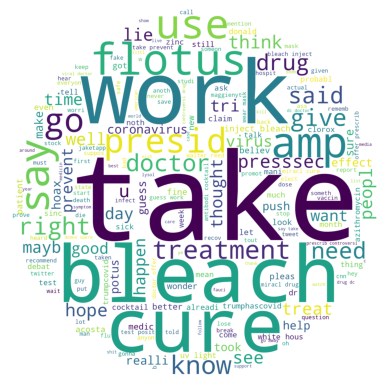

In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()
from wordcloud import WordCloud
import numpy as np
# text = df_tweets_manual.full_text


rad = 1000 # decrease this value will make the plot in poor resolution

x, y = np.ogrid[:rad * 2, 0: rad * 2]
circle_mask = (x - rad) ** 2 + (y - rad)**2 > rad**2
circle_mask = 255 * circle_mask.astype(int)

text = df_tweets_manual.full_text
wc = WordCloud(background_color='white',
               width = 512,
               height=384,
               mask=circle_mask).generate(" ".join(text))

plt.imshow(wc)
plt.axis('off')


In [ ]:
!pip install pyunpack
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 1.3 MB/s eta 0:00:00


In [ ]:
from pyunpack import Archive

# Replace with your actual file path
rar_file_path = '/content/drive/MyDrive/Assignments/DS320/opinion-lexicon-English.rar'

# Replace with your desired output directory
output_directory = '/content/'

Archive(rar_file_path).extractall(output_directory)


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
# df_pos = pd.read_csv("your_dataframe.csv")

# Sample text (assuming df_pos is your DataFrame)
text = ' '.join(df_tweets_manual['full_text'].tolist())

# Positive and Negative words from Bing lexicon
positive_words = set()
negative_words = set()

with open("/content/opinion-lexicon-English/positive-words.txt", "r", encoding='latin-1') as file:
    positive_words = set(file.read().splitlines())

with open("/content/opinion-lexicon-English/negative-words.txt", "r", encoding="latin-1") as file:
    negative_words = set(file.read().splitlines())


# Function to filter positive and negative words
def filter_words(text, word_set):
    return ' '.join([word.lower() for word in text.split() if word.lower() in word_set])

positive_text = filter_words(text, positive_words)
negative_text = filter_words(text, negative_words)

In [ ]:
import numpy as np

rad = 1000 # decrease this value will make the plot in poor resolution

x, y = np.ogrid[:rad * 2, :rad * 2]
lower_circle_mask = (((x - rad) ** 2 + (y - rad)**2 > rad**2) | (x < rad))
lower_circle_mask = 255 * lower_circle_mask.astype(int)

upper_circle_mask = (((x - rad) ** 2 + (y - rad)**2 > rad**2) | (x > rad))
upper_circle_mask = 255 * upper_circle_mask.astype(int)

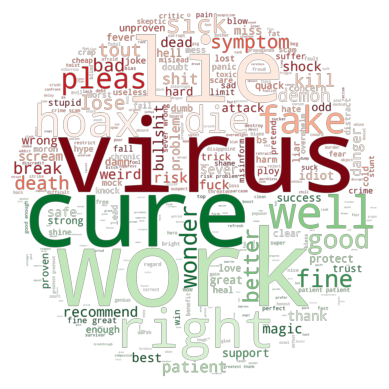

In [ ]:
from PIL import Image

# Generate the word clouds as before
wc1 = WordCloud(background_color=None, mode='RGBA',
               width = 512,
               height=384,
               mask=lower_circle_mask,
               colormap='Greens').generate(positive_text)

wc2 = WordCloud(background_color=None, mode='RGBA',
               width = 512,
               height=384,
               mask=upper_circle_mask,
               colormap='Reds').generate(negative_text)

# Convert word clouds to images
image1 = wc1.to_image()
image2 = wc2.to_image()

# Use Image.alpha_composite() to combine the two images
merged_image = Image.alpha_composite(image1, image2)

# Display the result
plt.imshow(merged_image, interpolation='bilinear')
plt.axis('off')
plt.show()


## Task 8, 9, and 10

Imagine that you are trying to gain insights from the HCQ dataset. You have done 7 plots. Take a moment to review what you get from those plots: patterns, trends, relationships, ...

Now you will explore things yourself. Create 03 plots for task 8, 9, and 10. For each plot, justify why you want to create it. You may not see any patterns but it is worth it as you know no patterns there.

You can use some hints I put here but you do not have to. I would love to see your exploration.

Hints:

#1 Think about the State column you created in the midterm project. We have not used it.

#2 We have not used a period of a month


## Task 8: Tweet count distribution for every state

We want to see if the Google Trend score correlates with the number of tweets in each sate. So we plot the map distribution for # of tweets in each state and compare it with the map plotted in task 6.

We can see that Google Trend score and Number of Tweets in each state aren't proportional. A state can have a high Google trend score but low # of tweet

In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()
df8 = df_tweets.groupby(df_tweets.state).full_text.count()
gdf = gpd.read_file('/content/cb_2018_us_state_500k.zip')
gdf.head()
df = df8
gdf = gdf.merge(df,left_on='STUSPS',right_on='state')


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(



Top 5 States with the highest number of Tweets


,NAME,full_text
15,California,10188
14,Texas,5417
24,New York,4266
9,Florida,4037
18,Pennsylvania,1907


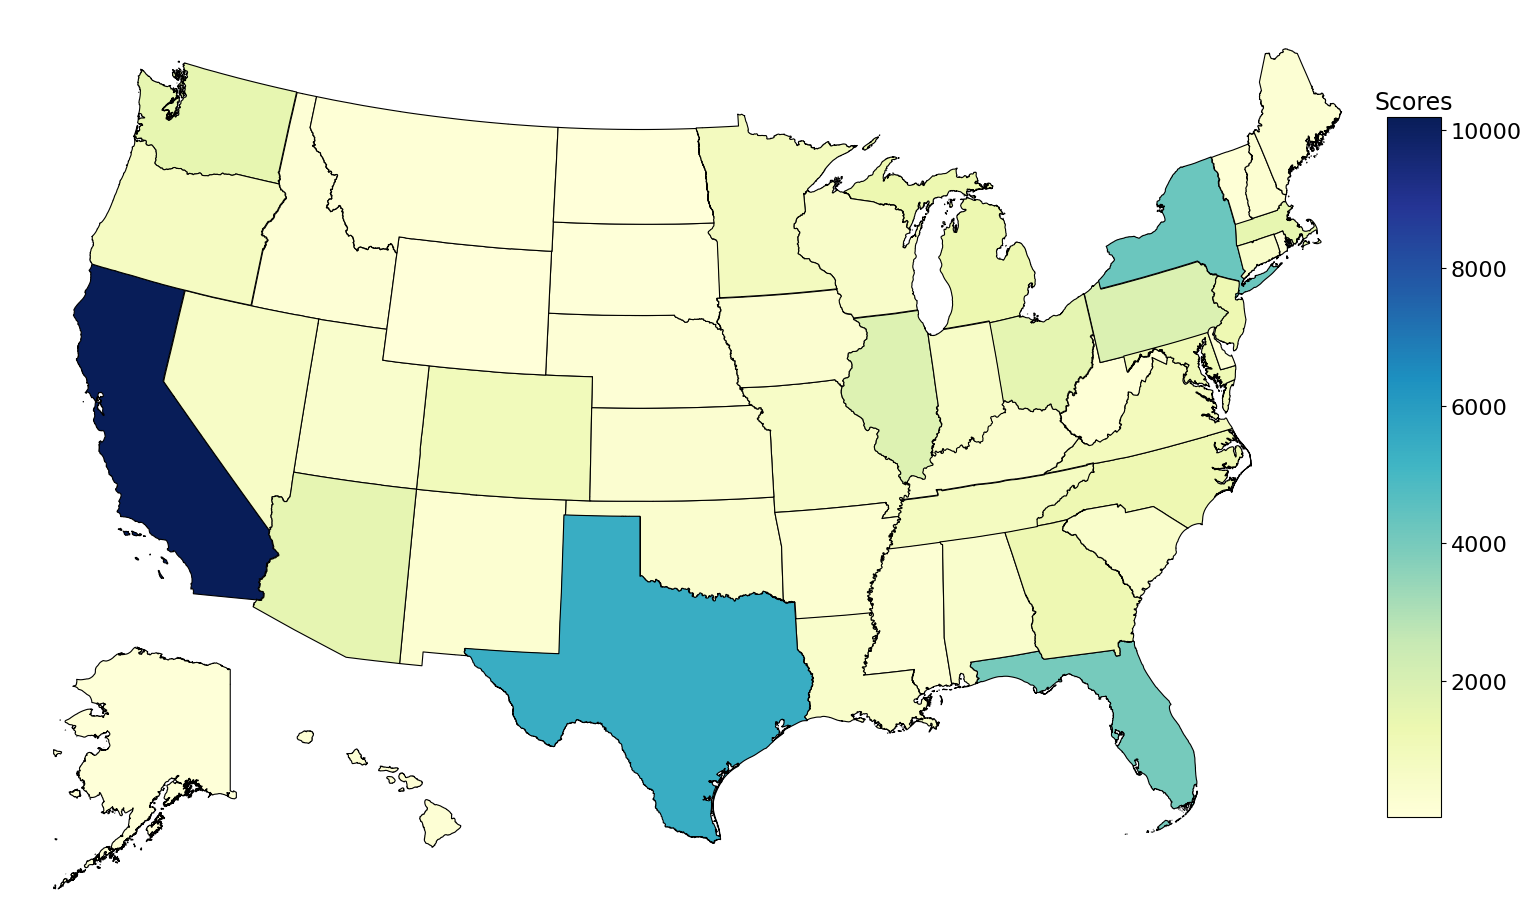

In [ ]:
variable = 'full_text'

# make a column for value_determined_color in gdf
# set the range for the choropleth values with the upper bound the rounded up maximum value
vmin, vmax = gdf.full_text.min(), gdf.full_text.max() #math.ceil(df.Score.max())
colormap = "YlGnBu"
gdf = makeColorColumn(gdf,variable,vmin,vmax)

# create "visframe" as a re-projected gdf using EPSG 2163 for CONUS
visframe = gdf.to_crs({'init':'epsg:2163'})

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box around the vis
ax.axis('off')

# Create colorbar legend
fig = ax.get_figure()
# add colorbar axes to the figure
# This will take some iterating to get it where you want it [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.89, 0.23, 0.03, 0.5])

# cbax.set_title('Scores\n', **hfont, fontdict={'fontsize': '15', 'fontweight' : '0'})
cbax.set_title('Scores', size=17)

# add color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
# reformat tick labels on legend
sm._A = []
comma_fmt = FuncFormatter(lambda x, p: format(x, '.0f'))
# comma_fmt = FuncFormatter(lambda x, p: format(x))
fig.colorbar(sm, cax=cbax, format=comma_fmt)
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)

# create map
# Note: we're going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
for row in visframe.itertuples():
    if row.STUSPS not in ['AK','HI']:
        vf = visframe[visframe.STUSPS==row.STUSPS]
        c = gdf[gdf.STUSPS==row.STUSPS][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='black')

# add Alaska
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])
akax.axis('off')
# polygon to clip western islands
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = gdf[gdf.STUSPS=='AK']
alaska_gdf.clip(polygon).plot(color=gdf[gdf.STUSPS=='AK'].value_determined_color, linewidth=0.8,ax=akax, edgecolor='black')

# add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])
hiax.axis('off')
# polygon to clip western islands
hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = gdf[gdf.STUSPS=='HI']
hawaii_gdf.clip(hipolygon).plot(column=variable, color=hawaii_gdf['value_determined_color'], linewidth=0.8,ax=hiax, edgecolor='black')

fig.savefig(os.getcwd()+'/state_scores.png',dpi=400, bbox_inches="tight")

print("\nTop 5 States with the highest number of Tweets")
gdf.nlargest(5, 'full_text')[["NAME", "full_text"]]

Text(0, 0.5, 'Score')

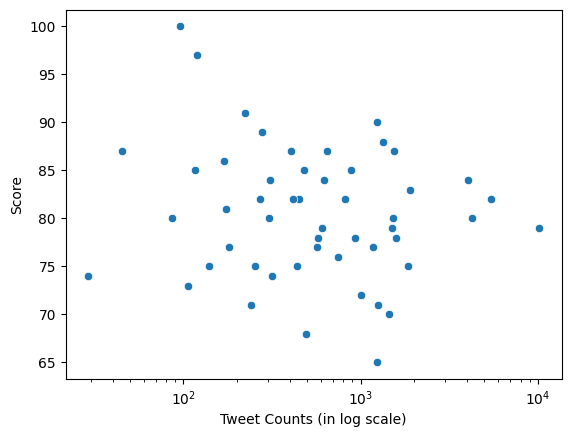

In [ ]:
df = pd.merge(df8, df_geo, left_on='state', right_on='Abb')
sns.scatterplot(x = df.full_text, y=df.Score)
plt.xscale('log')
plt.xlabel("Tweet Counts (in log scale)")
plt.ylabel("Score")

## Task 9: Favorite count distribution for every state

In Task 8, we saw that Number of tweets does not correlate with Google Trend Score. But maybe Number of tweets was not the right metric to look at.

We want to see if the favorite_count for each state correlates with Google Trend score or the number of tweets

In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()
df9 = df_tweets.groupby(df_tweets.state).favorite_count.sum()
gdf = gpd.read_file('/content/cb_2018_us_state_500k.zip')
gdf.head()
df = df9
gdf = gdf.merge(df,left_on='STUSPS',right_on='state')


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(



Top 5 States with the highest number of Favorite Count


,NAME,favorite_count
35,District of Columbia,2846919
24,New York,1658115
15,California,1114704
9,Florida,405717
34,Arizona,265021


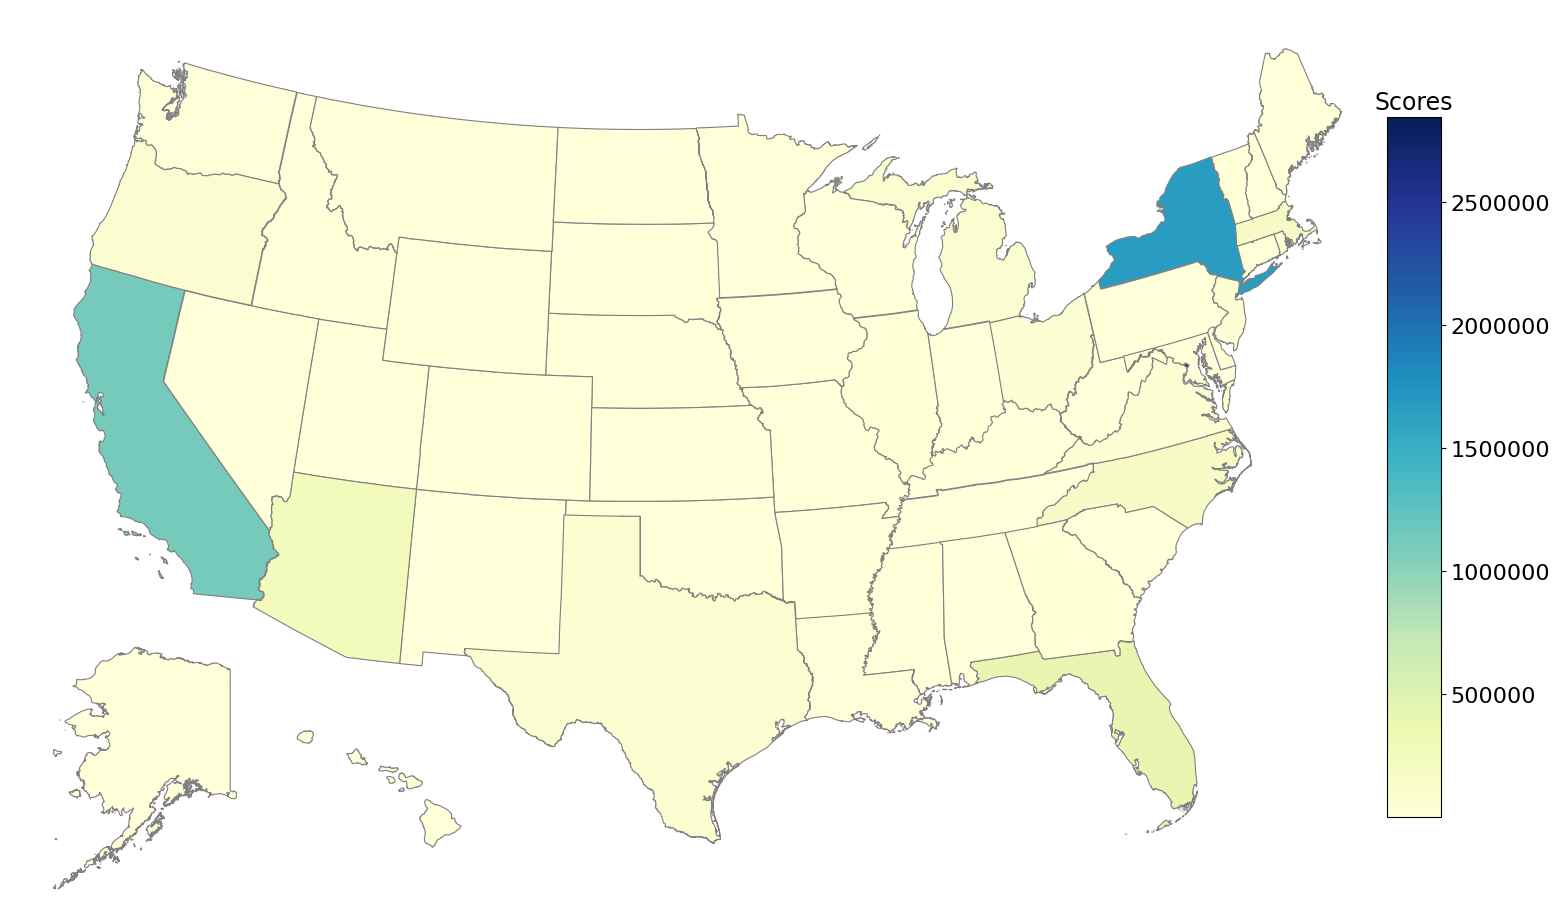

In [ ]:
# **************************
# set the value column that will be visualised
variable = 'favorite_count'

# make a column for value_determined_color in gdf
# set the range for the choropleth values with the upper bound the rounded up maximum value
vmin, vmax = gdf.favorite_count.min(), gdf.favorite_count.max() #math.ceil(df.Score.max())
# Choose the continuous colorscale "YlOrBr" from https://matplotlib.org/stable/tutorials/colors/colormaps.html
colormap = "YlGnBu"
gdf = makeColorColumn(gdf,variable,vmin,vmax)

# create "visframe" as a re-projected gdf using EPSG 2163 for CONUS
visframe = gdf.to_crs({'init':'epsg:2163'})

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box around the vis
ax.axis('off')

# Create colorbar legend
fig = ax.get_figure()
# add colorbar axes to the figure
# This will take some iterating to get it where you want it [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.89, 0.23, 0.03, 0.5])

# cbax.set_title('Scores\n', **hfont, fontdict={'fontsize': '15', 'fontweight' : '0'})
cbax.set_title('Scores', size=17)

# add color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
# reformat tick labels on legend
sm._A = []
comma_fmt = FuncFormatter(lambda x, p: format(x, '.0f'))
# comma_fmt = FuncFormatter(lambda x, p: format(x))
fig.colorbar(sm, cax=cbax, format=comma_fmt)
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)

# create map
# Note: we're going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
for row in visframe.itertuples():
    if row.STUSPS not in ['AK','HI']:
        vf = visframe[visframe.STUSPS==row.STUSPS]
        c = gdf[gdf.STUSPS==row.STUSPS][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='grey')

# add Alaska
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])
akax.axis('off')
# polygon to clip western islands
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = gdf[gdf.STUSPS=='AK']
alaska_gdf.clip(polygon).plot(color=gdf[gdf.STUSPS=='AK'].value_determined_color, linewidth=0.8,ax=akax, edgecolor='grey')

# add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])
hiax.axis('off')
# polygon to clip western islands
hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = gdf[gdf.STUSPS=='HI']
hawaii_gdf.clip(hipolygon).plot(column=variable, color=hawaii_gdf['value_determined_color'], linewidth=0.8,ax=hiax, edgecolor='grey')

fig.savefig(os.getcwd()+'/state_scores.png',dpi=400, bbox_inches="tight")

print("\nTop 5 States with the highest number of Favorite Count")
gdf.nlargest(5, 'favorite_count')[["NAME", "favorite_count"]]

Text(0, 0.5, 'Score')

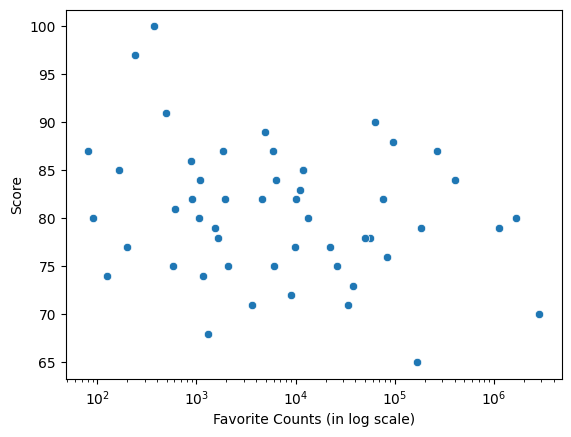

In [ ]:
df = pd.merge(df9, df_geo, left_on='state', right_on='Abb')
sns.scatterplot(x = df.favorite_count, y=df.Score)
plt.xscale('log')
plt.xlabel("Favorite Counts (in log scale)")
plt.ylabel("Score")

## Task 10:
We want to analyse number of tweets, total favorite count, total reply count by month. We can see there that the three statistics are correlated to each other.

In [ ]:
df10 = df_tweets.groupby(df_tweets.created_at.dt.month).agg({
    'full_text': 'count',           # Number of tweets
    'favorite_count': 'sum',        # Total favorites
    'reply_count': 'sum'
}).reset_index()

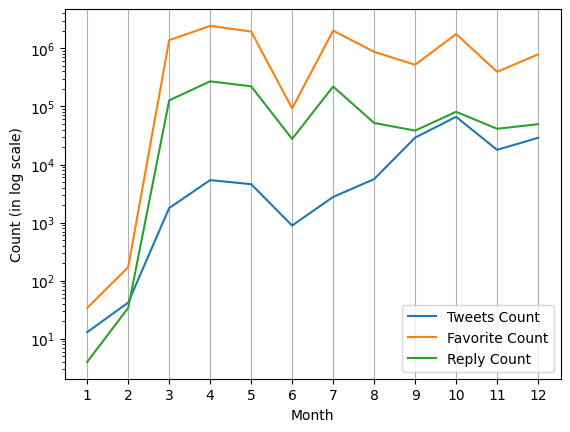

In [ ]:
sns.lineplot(x=df10.created_at, y=df10.full_text, label='Tweets Count')
sns.lineplot(x=df10.created_at, y=df10.favorite_count, label='Favorite Count')
sns.lineplot(x=df10.created_at, y=df10.reply_count, label='Reply Count')

# Set labels and scale
plt.xlabel("Month")
plt.ylabel("Count (in log scale)")
plt.grid(visible=True, axis='x')

# Renaming the variable to avoid conflict
ticks = range(1,13)
plt.xticks(ticks, ticks)

plt.yscale('log')

# Add legend
plt.legend()

# Show the plot
plt.show()
